In [2]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler ## Not use it 
from sklearn.metrics import classification_report ## show model report summary
from sklearn.neighbors import KNeighborsClassifier ## use to find the proper neighbor values
from sklearn.ensemble import RandomForestRegressor ## use to find the important features
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import learning_curve
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [10]:
data = pd.read_csv("DataPrep.csv")

In [11]:
data.head(5)

,C.35 Ayutthaya (Chao Phraya R.),S.5 Ayutthaya (Pa Sak R.),C.7A Ang Thong (Chao Phraya R.),S.26 Tha Ruea (Pa Sak R.),C.13 Sapphaya (Chao Phraya r.),S.9 Kaeng Khoi (Pa Sak r.),C.35 river/brae,S.5 river/brae,C.7A river/brae,S.26 river/brae,date
0,0.74,0.79,1.02,0.70,0.0,0.0,0.161572,0.168085,0.102,0.08750,2020-08-18
1,0.68,0.76,0.87,0.65,0.0,2.0,0.148472,0.161702,0.087,0.08125,2020-08-19
2,0.30,0.64,0.85,0.64,0.0,0.5,0.065502,0.136170,0.085,0.08000,2020-08-20
3,0.33,0.67,0.90,0.73,3.0,1.5,0.072052,0.142553,0.090,0.09125,2020-08-21
4,0.62,0.59,0.90,0.79,8.0,12.5,0.135371,0.125532,0.090,0.09875,2020-08-22


In [12]:
data.isna().sum()

Unnamed: 0                         0
C.35 Ayutthaya (Chao Phraya R.)    0
S.5 Ayutthaya (Pa Sak R.)          0
C.7A Ang Thong (Chao Phraya R.)    0
S.26 Tha Ruea (Pa Sak R.)          0
C.13 Sapphaya (Chao Phraya r.)     0
S.9 Kaeng Khoi (Pa Sak r.)         0
C.35 river/brae                    0
S.5 river/brae                     0
C.7A river/brae                    0
S.26 river/brae                    0
date                               0
critical_wat_lev_C.35              0
critical_wat_lev_S.5               0
Class_C.35                         0
Class_S.5                          0
dtype: int64

In [57]:
X = data.drop(columns=['C.35 Ayutthaya (Chao Phraya R.)', 'S.5 Ayutthaya (Pa Sak R.)','date'])
y = data[['C.35 Ayutthaya (Chao Phraya R.)', 'S.5 Ayutthaya (Pa Sak R.)']]

In [58]:
y

,C.35 Ayutthaya (Chao Phraya R.),S.5 Ayutthaya (Pa Sak R.)
0,0.74,0.79
1,0.68,0.76
2,0.30,0.64
3,0.33,0.67
4,0.62,0.59
...,...,...
83,4.19,2.77
84,4.51,2.98
85,4.79,3.21
86,4.97,3.41


In [59]:
X

,C.7A Ang Thong (Chao Phraya R.),S.26 Tha Ruea (Pa Sak R.),C.13 Sapphaya (Chao Phraya r.),S.9 Kaeng Khoi (Pa Sak r.),C.35 river/brae,S.5 river/brae,C.7A river/brae,S.26 river/brae
0,1.02,0.70,0.0,0.0,0.161572,0.168085,0.102,0.08750
1,0.87,0.65,0.0,2.0,0.148472,0.161702,0.087,0.08125
2,0.85,0.64,0.0,0.5,0.065502,0.136170,0.085,0.08000
3,0.90,0.73,3.0,1.5,0.072052,0.142553,0.090,0.09125
4,0.90,0.79,8.0,12.5,0.135371,0.125532,0.090,0.09875
...,...,...,...,...,...,...,...,...
83,7.82,3.44,35.3,0.0,0.914847,0.589362,0.782,0.43000
84,8.31,3.97,5.5,0.5,0.984716,0.634043,0.831,0.49625
85,8.60,4.39,0.0,0.0,1.045852,0.682979,0.860,0.54875
86,8.86,5.38,0.0,0.0,1.085153,0.725532,0.886,0.67250


In [60]:
y

,C.35 Ayutthaya (Chao Phraya R.),S.5 Ayutthaya (Pa Sak R.)
0,0.74,0.79
1,0.68,0.76
2,0.30,0.64
3,0.33,0.67
4,0.62,0.59
...,...,...
83,4.19,2.77
84,4.51,2.98
85,4.79,3.21
86,4.97,3.41


<AxesSubplot:>

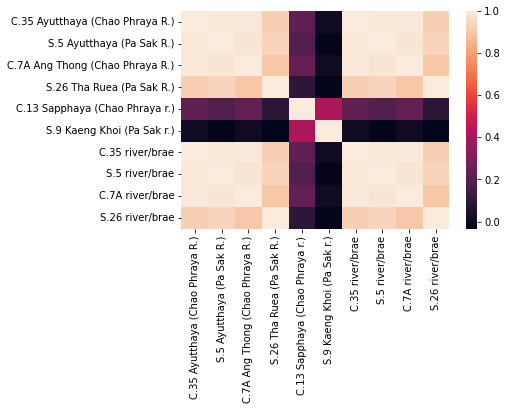

In [61]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.8, test_size = 0.2)

In [63]:
X_train

,C.7A Ang Thong (Chao Phraya R.),S.26 Tha Ruea (Pa Sak R.),C.13 Sapphaya (Chao Phraya r.),S.9 Kaeng Khoi (Pa Sak r.),C.35 river/brae,S.5 river/brae,C.7A river/brae,S.26 river/brae
55,0.99,0.72,1.1,0.5,0.163755,0.159574,0.099,0.09000
73,5.36,2.05,3.0,0.0,0.622271,0.408511,0.536,0.25625
11,1.04,0.75,0.0,0.0,0.165939,0.165957,0.104,0.09375
30,0.98,0.45,0.0,0.0,0.043668,0.104255,0.098,0.05625
40,1.01,0.99,0.0,40.0,0.189956,0.168085,0.101,0.12375
...,...,...,...,...,...,...,...,...
20,1.04,0.78,30.0,37.0,0.139738,0.117021,0.104,0.09750
60,1.25,0.82,0.0,0.0,0.207424,0.202128,0.125,0.10250
71,4.73,1.48,0.0,0.5,0.524017,0.325532,0.473,0.18500
14,1.08,0.70,0.0,3.0,0.183406,0.189362,0.108,0.08750


In [67]:
X_train_C = X_train.drop(columns=['S.26 Tha Ruea (Pa Sak R.)', 'S.9 Kaeng Khoi (Pa Sak r.)',
                        'S.5 river/brae', 'S.26 river/brae'])
X_train_C

,C.7A Ang Thong (Chao Phraya R.),C.13 Sapphaya (Chao Phraya r.),C.35 river/brae,C.7A river/brae
55,0.99,1.1,0.163755,0.099
73,5.36,3.0,0.622271,0.536
11,1.04,0.0,0.165939,0.104
30,0.98,0.0,0.043668,0.098
40,1.01,0.0,0.189956,0.101
...,...,...,...,...
20,1.04,30.0,0.139738,0.104
60,1.25,0.0,0.207424,0.125
71,4.73,0.0,0.524017,0.473
14,1.08,0.0,0.183406,0.108


In [68]:
X_train_C.dtypes

C.7A Ang Thong (Chao Phraya R.)    float64
C.13 Sapphaya (Chao Phraya r.)     float64
C.35 river/brae                    float64
C.7A river/brae                    float64
dtype: object

In [70]:
y_train_C = y_train.drop(columns=['S.5 Ayutthaya (Pa Sak R.)'])
y_train_C

,C.35 Ayutthaya (Chao Phraya R.)
55,0.75
73,2.85
11,0.76
30,0.20
40,0.87
...,...
20,0.64
60,0.95
71,2.40
14,0.84


In [71]:
X_train_S = X_train.drop(columns=['C.7A Ang Thong (Chao Phraya R.)', 'C.13 Sapphaya (Chao Phraya r.)',
                        'C.35 river/brae', 'C.7A river/brae'])
X_train_S

,S.26 Tha Ruea (Pa Sak R.),S.9 Kaeng Khoi (Pa Sak r.),S.5 river/brae,S.26 river/brae
55,0.72,0.5,0.159574,0.09000
73,2.05,0.0,0.408511,0.25625
11,0.75,0.0,0.165957,0.09375
30,0.45,0.0,0.104255,0.05625
40,0.99,40.0,0.168085,0.12375
...,...,...,...,...
20,0.78,37.0,0.117021,0.09750
60,0.82,0.0,0.202128,0.10250
71,1.48,0.5,0.325532,0.18500
14,0.70,3.0,0.189362,0.08750


In [73]:
X_train_S.dtypes

S.26 Tha Ruea (Pa Sak R.)     float64
S.9 Kaeng Khoi (Pa Sak r.)    float64
S.5 river/brae                float64
S.26 river/brae               float64
dtype: object

In [72]:
y_train_C = y_train.drop(columns=['C.35 Ayutthaya (Chao Phraya R.)'])
y_train_C

,S.5 Ayutthaya (Pa Sak R.)
55,0.75
73,1.92
11,0.78
30,0.49
40,0.79
...,...
20,0.55
60,0.95
71,1.53
14,0.89


In [15]:
from sklearn import preprocessing
from sklearn import utils

In [16]:
y_train

,C.35 Ayutthaya (Chao Phraya R.)
55,0.75
73,2.85
11,0.76
30,0.20
40,0.87
...,...
20,0.64
60,0.95
71,2.40
14,0.84


In [31]:
Knn = KNeighborsClassifier()
Knn.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [40]:
parameters = { 
   'n_neighbors': [9,13,17,25,33,47,51,73]

 }
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=5, p=2,
 weights='uniform')

y_pred = Knn.predict(X_test)
target_names = ['Non-Flooding', 'Flooding']
print(classification_report(y_test,y_pred, target_names=target_names))

              precision    recall  f1-score   support

Non-Flooding       0.78      1.00      0.88        14
    Flooding       0.00      0.00      0.00         4

    accuracy                           0.78        18
   macro avg       0.39      0.50      0.44        18
weighted avg       0.60      0.78      0.68        18



C:\Users\Chom\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Chom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pre

# Logistic Regression


In [18]:
Lr = LogisticRegression()

## c.35

In [ ]:
Lr.fit(X)